# Pip Installs I Made

In [2]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/unicorn_jesus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/unicorn_jesus/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Load dataset

In [4]:
data = pd.read_csv('train.txt', sep='\t', header=None, names=['Title', 'Origin', 'Genre', 'Director', 'Plot'])

print(data.head())

print(f"{data.isnull().sum()}, {len(data.isnull())}")

print("Genre value counts")
print(data['Genre'].value_counts())


                       Title     Origin    Genre       Director  \
0               Ela Cheppanu     Telugu  romance         Ramana   
1  A Nightmare on Elm Street   American   horror   Samuel Bayer   
2            American Gothic   American   horror     John Hough   
3                       Gang  Bollywood    crime    Mazhar Khan   
4         Intimate Relations    British    drama  Charles Frank   

                                                Plot  
0  Sekhar (Tarun) is a graduate from IIM and work...  
1  Kris Fowles (Katie Cassidy) goes to the Spring...  
2  Cynthia is traumatized by the death of her bab...  
3  Four friends, Gangu (Jackie Shroff), Abdul (Na...  
4  Crisis in a middle-class family when the son f...  
Title       0
Origin      0
Genre       0
Director    0
Plot        0
dtype: int64, 8041
Genre value counts
Genre
drama        1676
comedy       1193
horror       1108
action       1059
romance       886
western       829
crime         541
animation     535
sci-fi   

# Check genre distribution

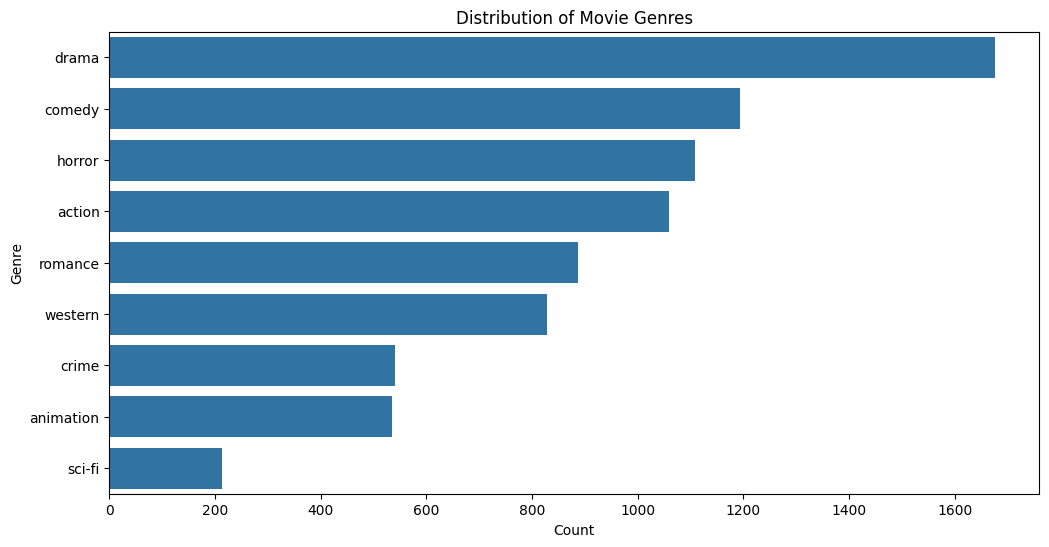

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(y='Genre', data=data, order=data['Genre'].value_counts().index)
plt.title('Distribution of Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# Word Cloud for Genres

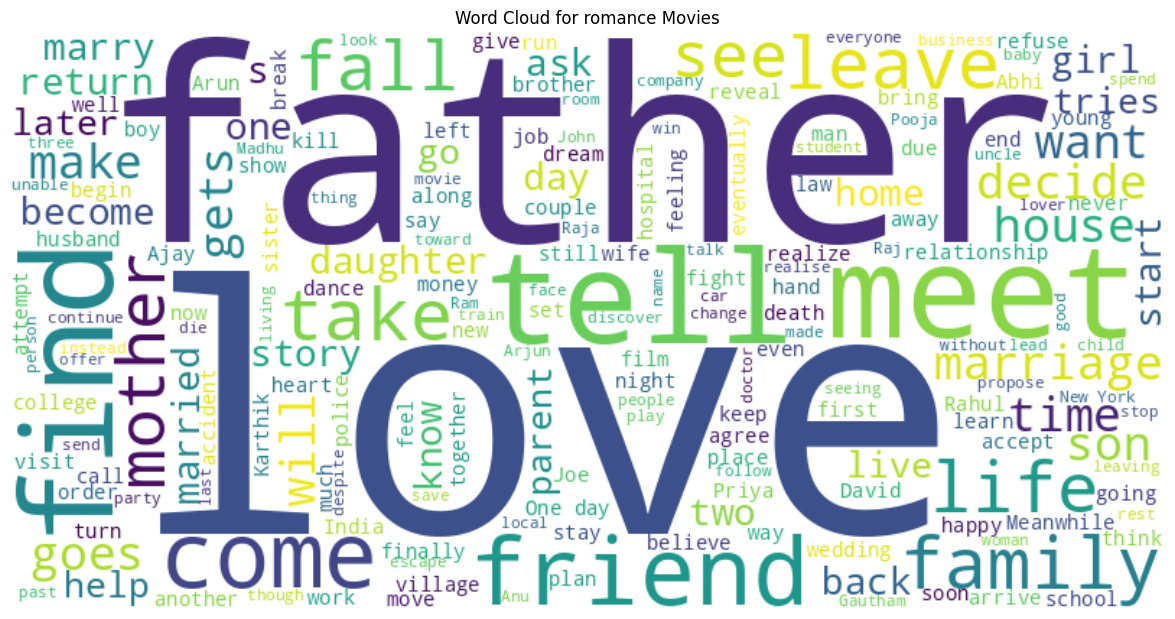

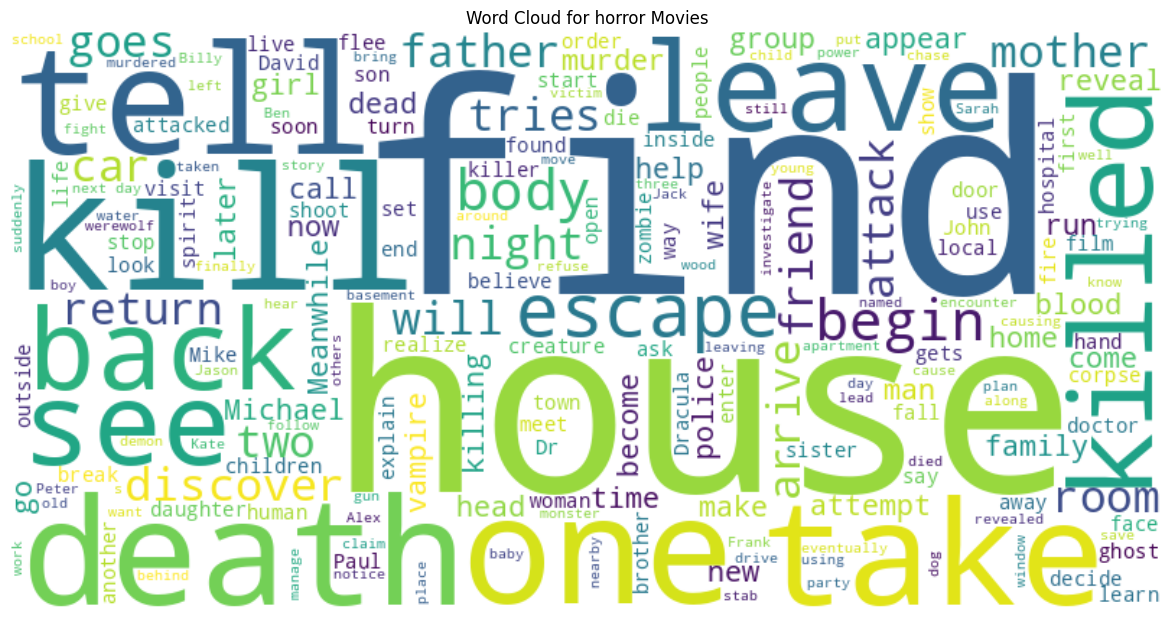

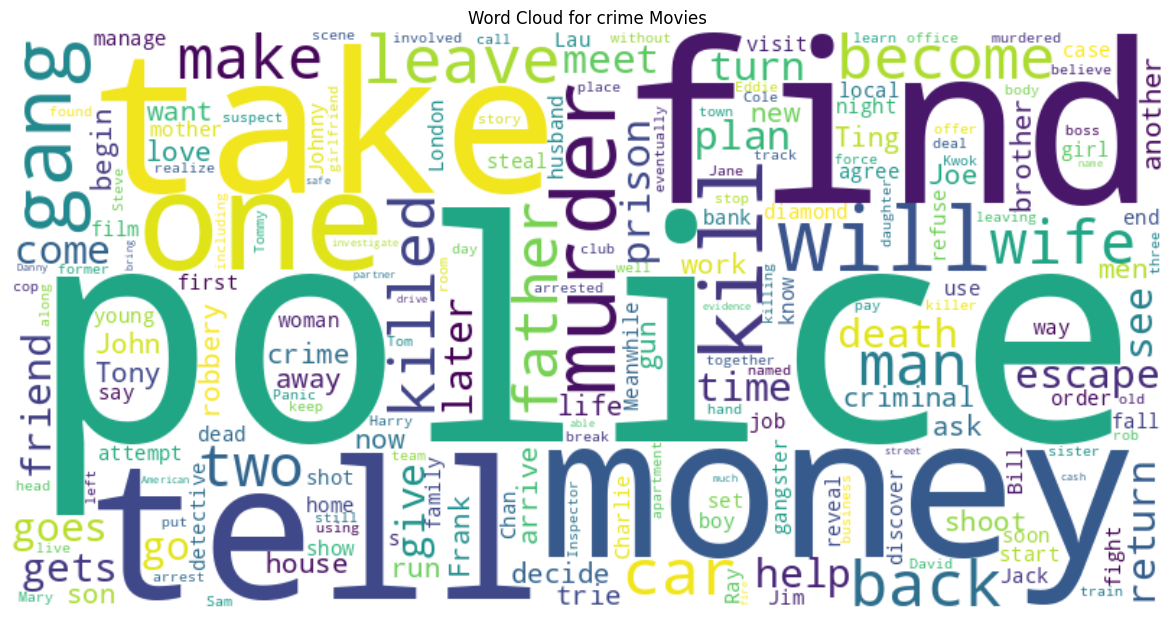

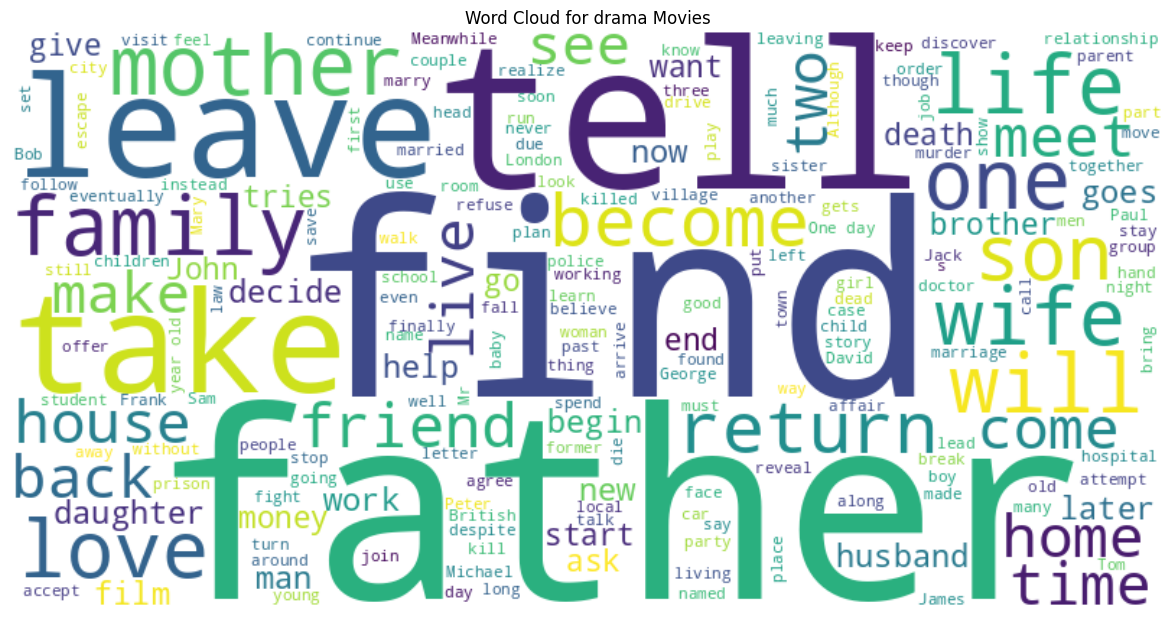

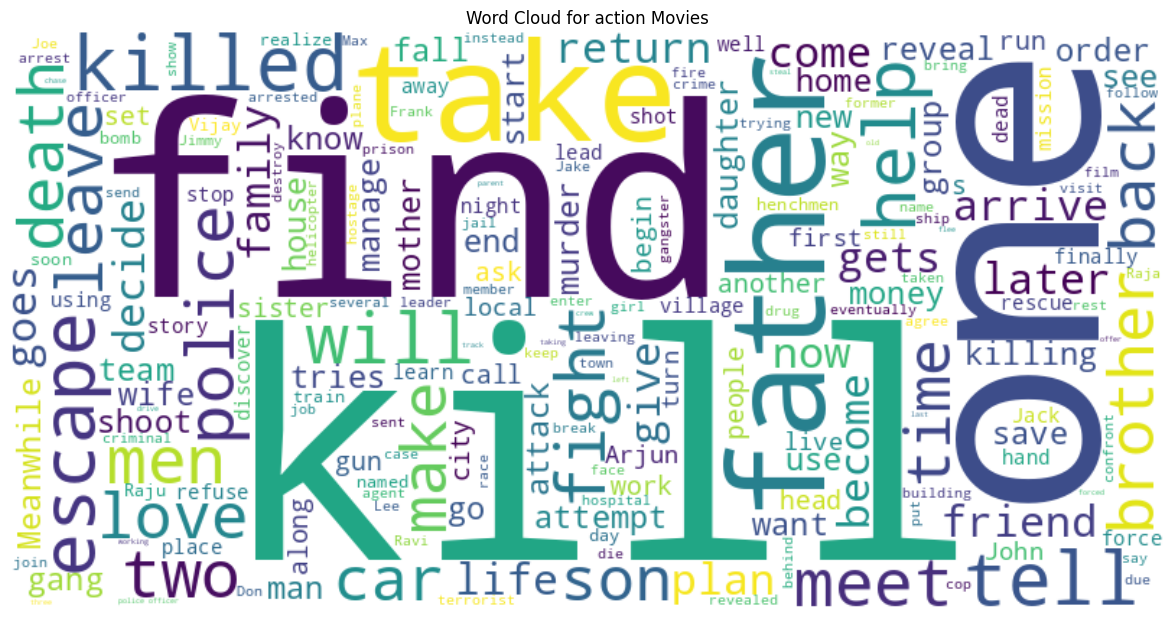

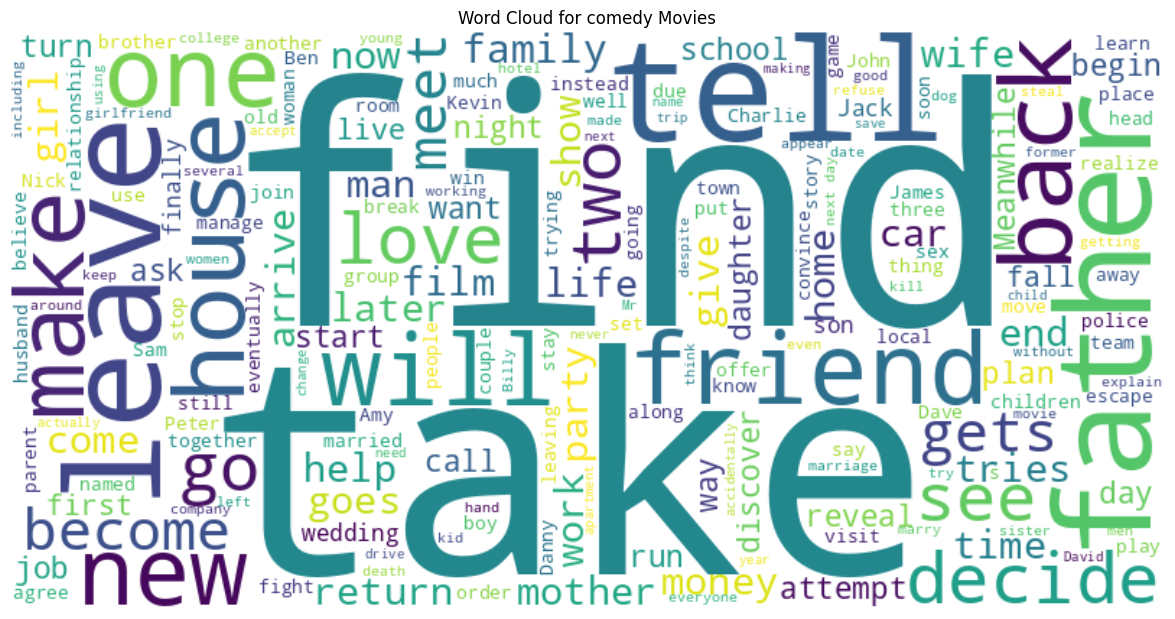

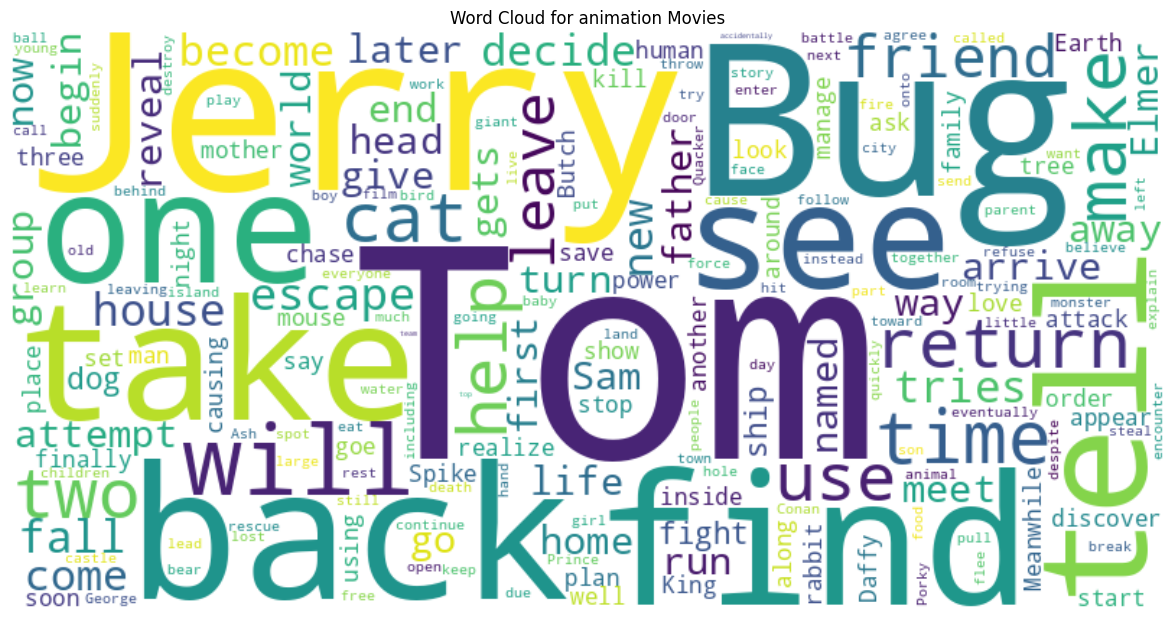

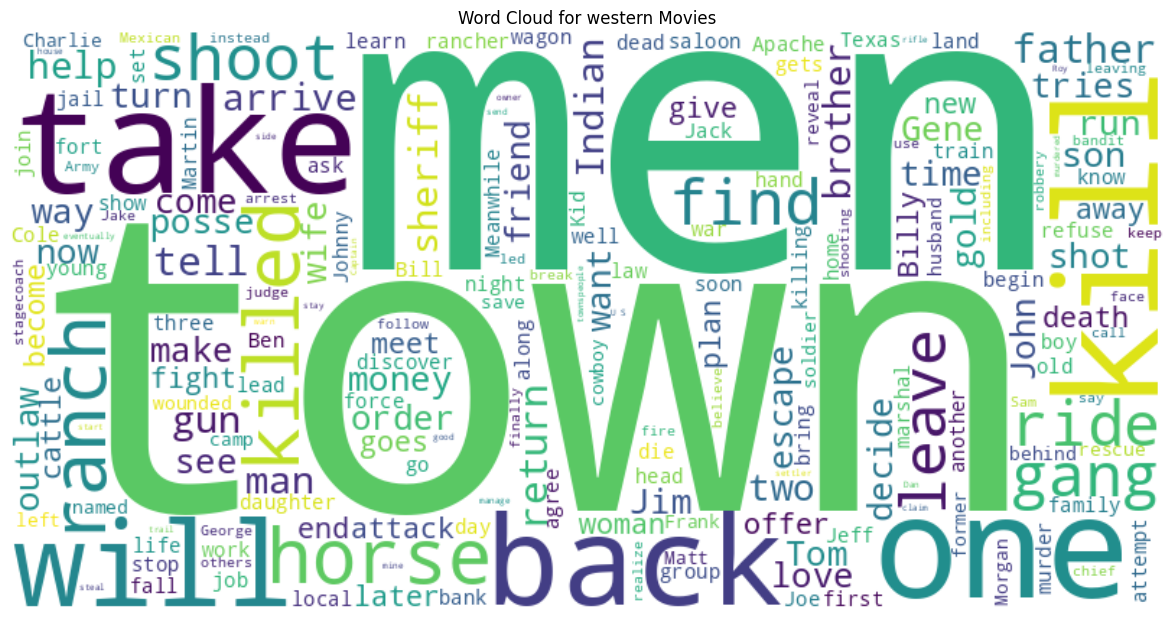

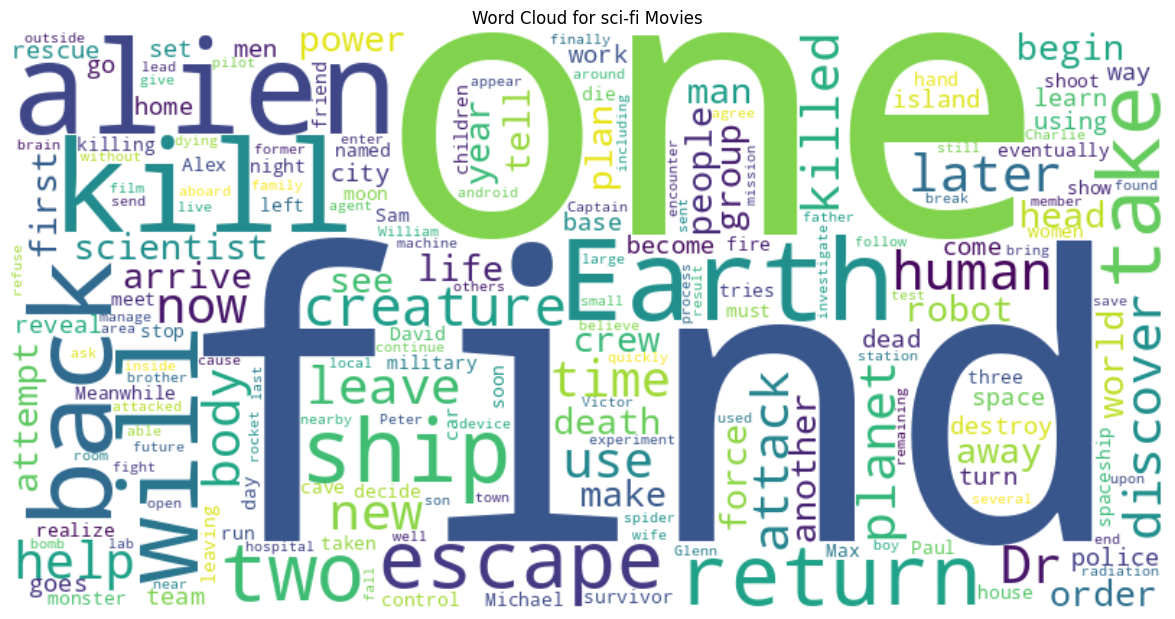

In [6]:
from wordcloud import WordCloud

genres = data['Genre'].unique()
for genre in genres:
    text = ' '.join(data[data['Genre'] == genre]['Plot'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(15, 7.5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {genre} Movies')
    plt.axis('off')
    plt.show()


# Most Frequent Words for Genre (Not Word Cloud)

love      1567
father     922
family     642
life       579
tells      571
day        543
time       522
mother     488
gets       477
friend     458
dtype: int64
house     1601
finds     1103
death     1000
tells      951
body       918
killed     908
later      907
night      906
home       849
man        842
dtype: int64
police    544
money     300
gang      256
man       233
murder    215
tells     211
car       197
killed    183
finds     180
wife      178
dtype: int64
father    1110
family     978
mother     972
home       969
life       928
tells      837
wife       824
film       821
man        804
love       751
dtype: int64
police    1107
kill       855
father     819
killed     766
men        621
tells      615
man        586
kills      582
later      575
help       553
dtype: int64
father    663
house     619
new       618
tells     615
man       573
home      560
later     553
gets      529
time      525
film      491
dtype: int64
tom      1447
jerry    1047
bugs     1007


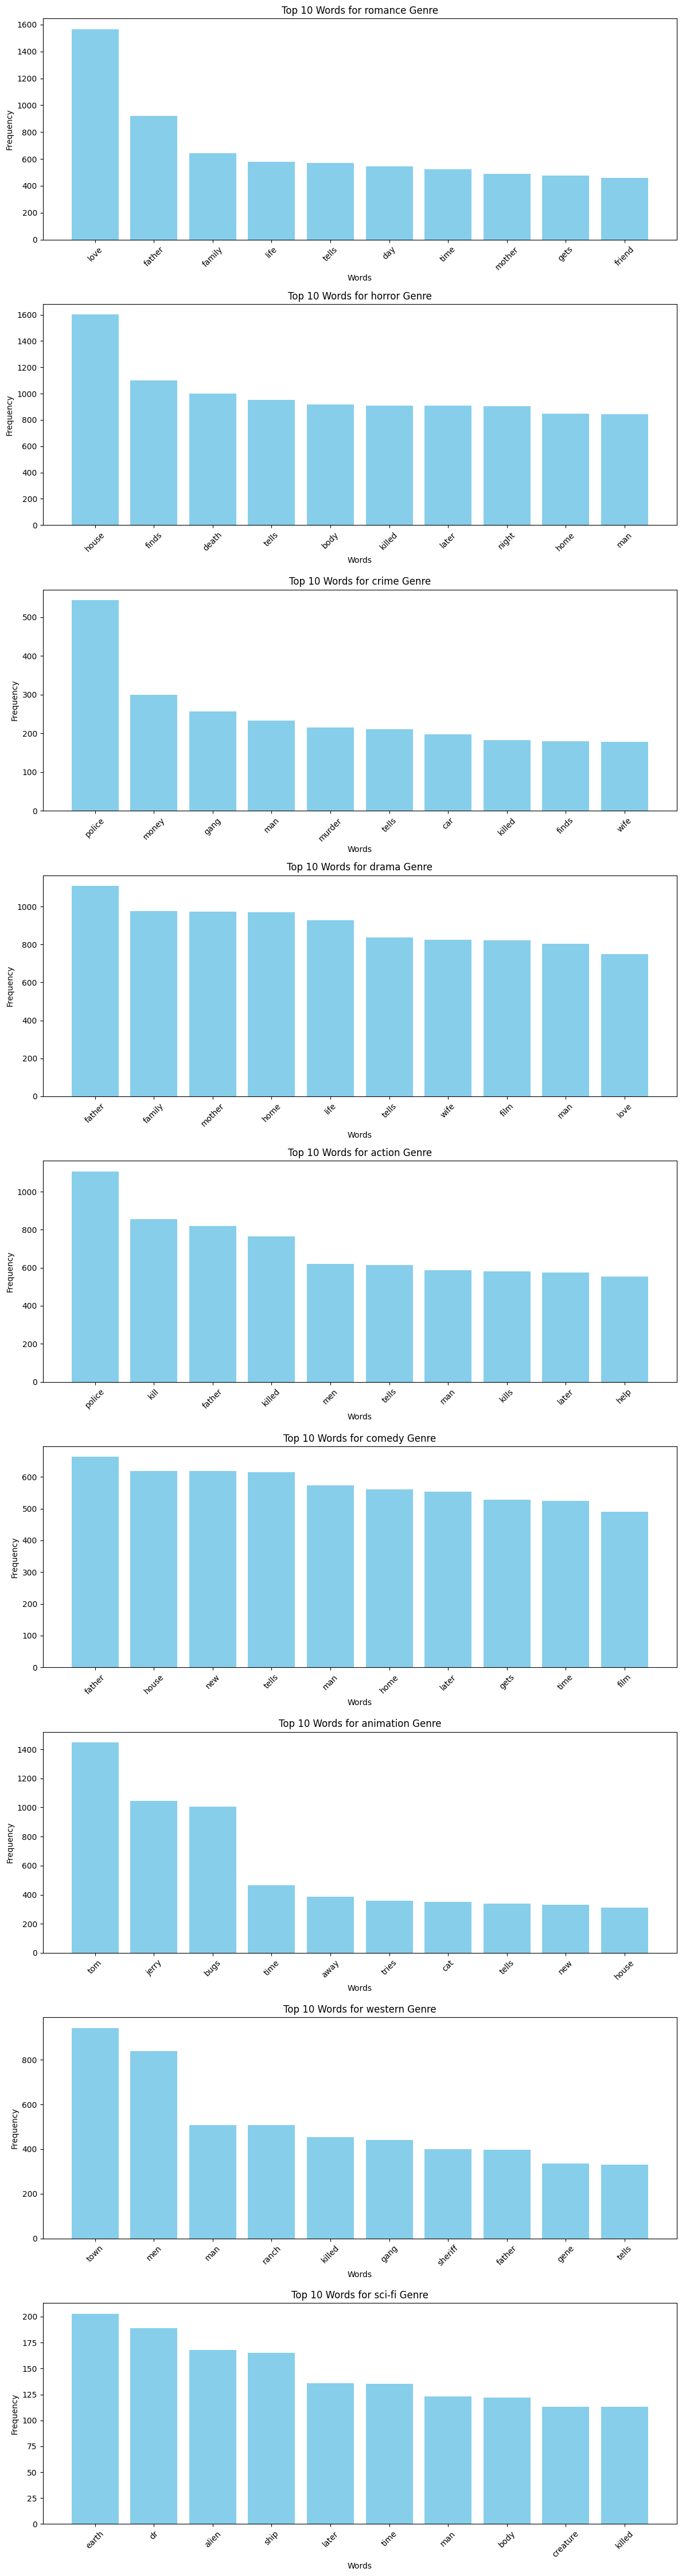

In [7]:

def plot_top_words_by_genre(data, num_top_words=10):
    genres = data['Genre'].unique()
    plt.figure(figsize=(12, len(genres) * 5))

    for idx, genre in enumerate(genres):
        genre_data = data[data['Genre'] == genre]['Plot']

        vectorizer = CountVectorizer(stop_words='english')
        genre_matrix = vectorizer.fit_transform(genre_data)

        word_freq = pd.DataFrame(genre_matrix.toarray(), columns=vectorizer.get_feature_names_out()).sum(axis=0)
        
        top_words = word_freq.nlargest(num_top_words)

        plt.subplot(len(genres), 1, idx + 1)
        plt.bar(top_words.index, top_words.values, color='skyblue')
        plt.title(f'Top {num_top_words} Words for {genre} Genre')
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        print(top_words)

    plt.tight_layout()
    plt.show()

plot_top_words_by_genre(data)

# Plot Length Distribution

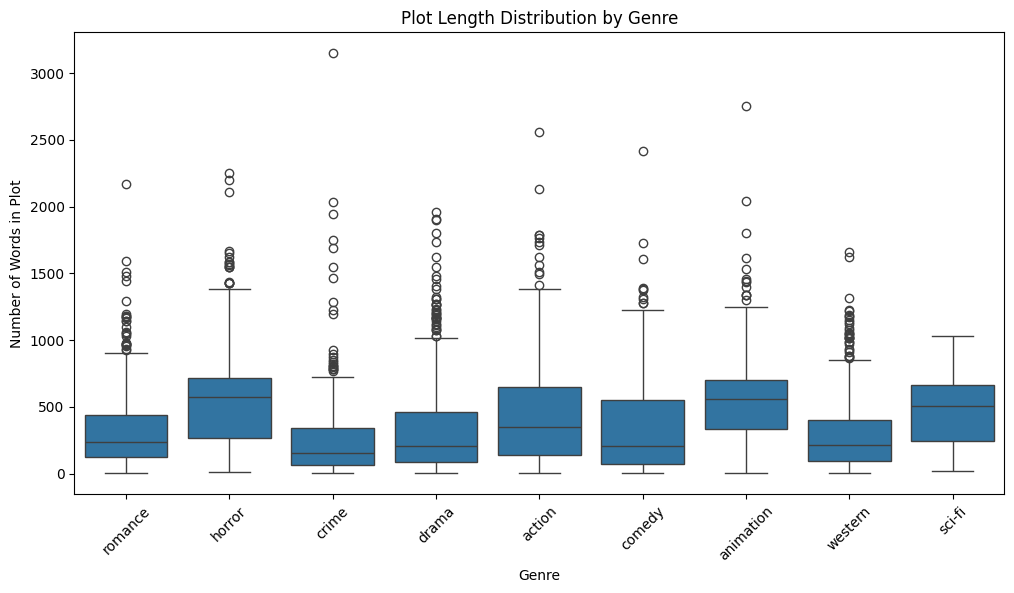

In [8]:
data['Plot_Length'] = data['Plot'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12,6))
sns.boxplot(x='Genre', y='Plot_Length', data=data)
plt.title('Plot Length Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Words in Plot')
plt.xticks(rotation=45)
plt.show()


# Frequency Analysis of Words

[('the', 161014), ('to', 111607), ('and', 106034), ('a', 80092), ('of', 53504), ('is', 49072), ('his', 43843), ('in', 43811), ('he', 30869), ('that', 30744), ('her', 30150), ('with', 29995), ('by', 22084), ('for', 21217), ('him', 17317), ('The', 16327), ('as', 16079), ('who', 16015), ('on', 15936), ('she', 15697), ('but', 15626), ('from', 13618), ('has', 12611), ('they', 12545), ('an', 12185), ('at', 11949), ('their', 11375), ('are', 10862), ('into', 9287), ('He', 9225), ('out', 8225), ('it', 7782), ('up', 7420), ('be', 7300), ('was', 7288), ('when', 6687), ('not', 6468), ('them', 6273), ('which', 6118), ('then', 6034), ('after', 5932), ('about', 5652), ('where', 5355), ('one', 5001), ('have', 4938), ('When', 4814), ('After', 4600), ('tells', 4557), ('him.', 4475), ('back', 4438), ('She', 4437), ('will', 4434), ('while', 4245), ('all', 4087), ('two', 4082), ('In', 4072), ('had', 3914), ('been', 3890), ('They', 3783), ('finds', 3769), ('get', 3751), ('find', 3721), ('only', 3609), ('als

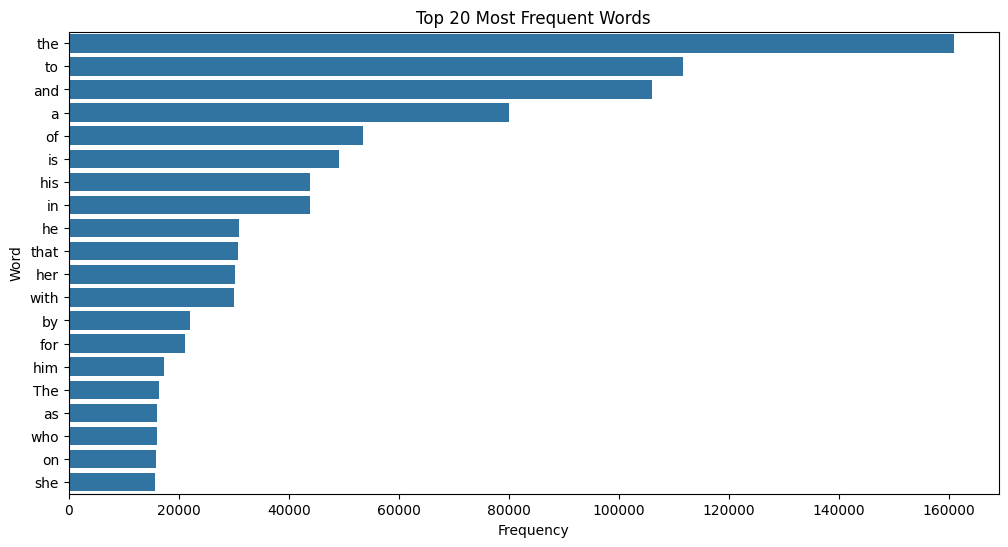

In [9]:
from collections import Counter

# print the top 100 most frequent words
all_words = ' '.join(data['Plot']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(100)
print(common_words)

# plot the top 20 most frequent words
all_words = ' '.join(data['Plot']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(12,6))
sns.barplot(x='Frequency', y='Word', data=df_common_words)
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


# Data Preprocessing

In [11]:
def clean_text(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation + string.digits), '', text)
    text = re.sub('\s+', ' ', text).strip()
    return text

def tokenize_and_remove_stopwords(text):
    tokens = text.split()
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = text.split()
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized)

# cleaning, tokenizing and removing stopwords TODO does it make sense to tokenize?
# even if we tokenize, does it make sense to tokenize like I'm doing?
data['Clean_Plot'] = data['Plot'].apply(clean_text)

stop_words = ["the", "to", "of", "a", 'and', 'is', 'his', 'in', 'he', 
            'that', 'her'] 
# TODO keep adding from list below 
# also, add words from the top 10 most frequent words in each genre

'''('with', 29995), ('by', 22084), 
('for', 21217), ('him', 17317), ('The', 16327), ('as', 16079), ('who', 16015), 
('on', 15936), ('she', 15697), ('but', 15626), ('from', 13618), ('has', 12611), 
('they', 12545), ('an', 12185), ('at', 11949), ('their', 11375), ('are', 10862), 
('into', 9287), ('He', 9225), ('out', 8225), ('it', 7782), ('up', 7420), ('be', 7300), 
('was', 7288), ('when', 6687), ('not', 6468), ('them', 6273), ('which', 6118), 
('then', 6034), ('after', 5932), ('about', 5652), ('where', 5355), ('one', 5001), 
('have', 4938), ('When', 4814), ('After', 4600), ('tells', 4557), ('him.', 4475), 
('back', 4438), ('She', 4437), ('will', 4434), ('while', 4245), ('all', 4087), 
('two', 4082), ('In', 4072), ('had', 3914), ('been', 3890), ('They', 3783), 
('finds', 3769), ('get', 3751), ('find', 3721), ('only', 3609), ('also', 3556), 
('before', 3516), ('off', 3454), ('being', 3419), ('As', 3408), ('goes', 3278), 
('takes', 3182), ('love', 3114), ('this', 3041), ('other', 3019), ('take', 2981), 
('tries', 2956), ('A', 2932), ('her.', 2906), ('go', 2876), ('gets', 2875), 
('can', 2867), ('father', 2784), ('man', 2770), ('police', 2718), ('so', 2710), 
('kill', 2676), ('over', 2641), ('through', 2619), ('down', 2451), ('family', 2428), 
('help', 2395), ('new', 2386), ('him,', 2363), ('time', 2352), ('killed', 2340), 
('now', 2320), ('house', 2308), ('comes', 2298), ('next', 2263), ('himself', 2260), ('film', 2240)]
]'''

data['Clean_Plot'] = data['Clean_Plot'].apply(tokenize_and_remove_stopwords)

# lemmatization -- TODO does it make sense to lemmatize? I think not
#data['Clean_Plot'] = data['Clean_Plot'].apply(lemmatize_text)


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_25991/2462327911.py:4: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text).strip()


# Above are shitty models that I've played with for fun

# Feature Extraction and Model Building (Multinomial Naive Bayes)

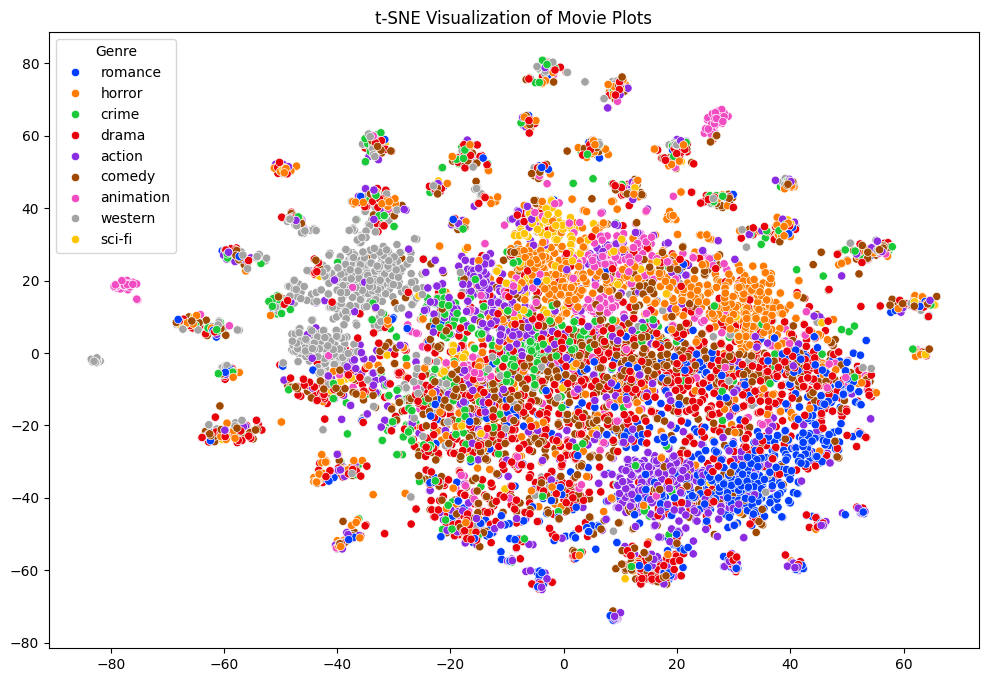

In [12]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['Clean_Plot']).toarray()

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Genre'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

# GPT generated this but it looks fun
svd = TruncatedSVD(n_components=50)
X_reduced = svd.fit_transform(X)

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_reduced)

plt.figure(figsize=(12,8))
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=data['Genre'], palette='bright')
plt.title('t-SNE Visualization of Movie Plots')
plt.show()



# Evaluate Model + Confusion Matrix

Accuracy: 0.5587321317588564
Classification Report:
               precision    recall  f1-score   support

      action       0.63      0.50      0.56       202
   animation       1.00      0.46      0.63       115
      comedy       0.50      0.29      0.37       223
       crime       0.88      0.06      0.12       108
       drama       0.36      0.83      0.51       319
      horror       0.72      0.76      0.74       223
     romance       0.64      0.38      0.47       186
      sci-fi       0.00      0.00      0.00        39
     western       0.92      0.87      0.89       194

    accuracy                           0.56      1609
   macro avg       0.63      0.46      0.48      1609
weighted avg       0.63      0.56      0.54      1609



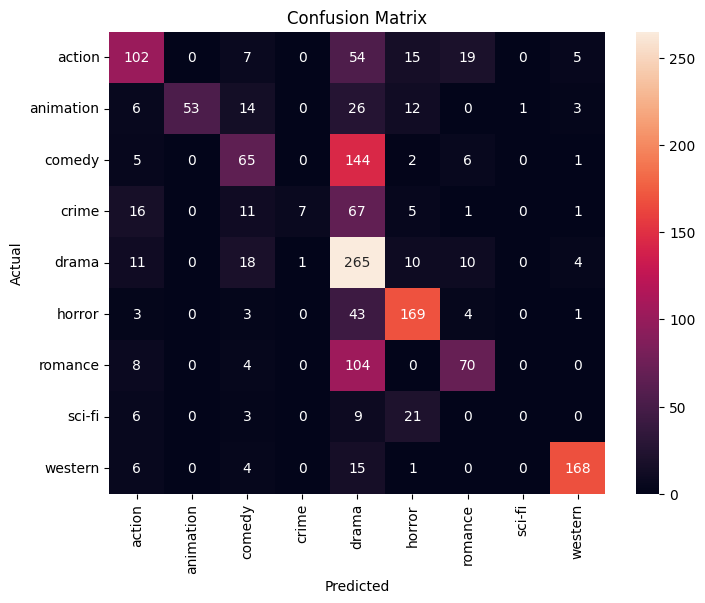

In [13]:
y_pred = nb_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



# Support Vector Classification

In [14]:
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train, y_train)

y_pred_svc = svc_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc, target_names=label_encoder.classes_))


Accuracy: 0.6426351771286514
Classification Report:
               precision    recall  f1-score   support

      action       0.58      0.65      0.61       202
   animation       0.86      0.63      0.73       115
      comedy       0.47      0.53      0.50       223
       crime       0.69      0.38      0.49       108
       drama       0.49      0.65      0.56       319
      horror       0.82      0.83      0.82       223
     romance       0.69      0.50      0.58       186
      sci-fi       0.67      0.36      0.47        39
     western       0.93      0.88      0.91       194

    accuracy                           0.64      1609
   macro avg       0.69      0.60      0.63      1609
weighted avg       0.67      0.64      0.64      1609

